# Lyrics Scraping

In [ ]:
from bs4 import BeautifulSoup
from urllib.request import *

def lyrics_link_generator():
    main_url = "https://www.azlyrics.com/l/linkinpark.html"
    mr = urlopen(main_url).read()
    main_soup = BeautifulSoup(mr)
    a_s = main_soup.find_all("div", class_="container main-page")[0]\
        .find_all('div', class_="col-xs-12 col-md-6 text-center")[0]\
        .find_all('a')
    for a_ in a_s:
        try:
            href = a_.attrs['href']
            if (href.startswith('../lyrics')):
                yield "https://www.azlyrics.com" + href[2:]
        except:
            pass
        
def parse_text(url_):
    r = urlopen(url_).read()
    soup = BeautifulSoup(r)
    return soup.find_all("div", class_="container main-page")[0].find_all('div', class_=None)[0].get_text()

gen = lyrics_link_generator()
lyrics = ""

for url_ in gen:
    print(url_)
    lyrics += " " + parse_text(url_)
    
with open('lp_lyrics.txt', 'w') as f:
    f.write(lyrics)

In [5]:
print(lyrics[2000:2499])

try to hide yourself in the world of pretend
But when the paper's crumpled up it can't be perfect again

[Mark Wakefield (Mike Shinoda):]
From the top to the bottom (bottom to top I stop)
At the core of the rotten (stop to just what I thought)
But sun has escaped us (so bright in the sky)
And I'm far from a wait list (thinking, why did I try?)

From the top to the bottom (bottom to top I stop)
At the core of the rotten (stop to just what I thought)
But sun has escaped us (so bright in the sky)



# WordCloud

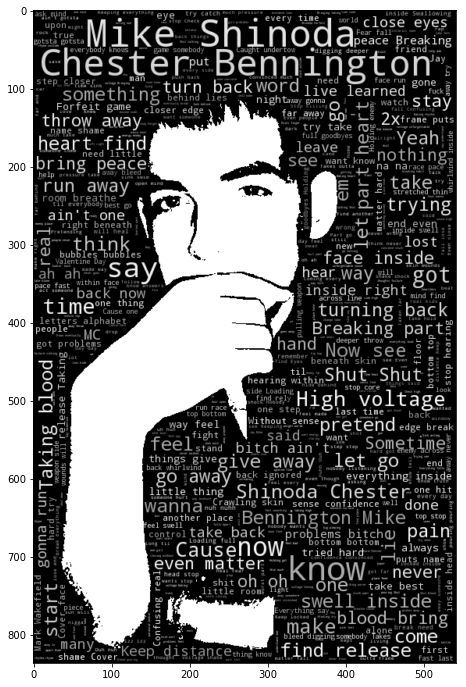

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import cv2
import numpy as np
import random
from wordcloud import WordCloud, STOPWORDS

matplotlib.rcParams['figure.figsize'] = [16, 12]

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

img = cv2.imread("./emo_edited1.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0.3)
_, binary = cv2.threshold(gray,1,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

with open('lp_lyrics.txt', 'r') as f:
    lyrics = f.read()

wc = WordCloud(mask=binary, max_words=500)
wc.generate(lyrics)
wc.recolor(color_func=grey_color_func, random_state=3)
wc_array = wc.to_array()
new = wc_array + np.stack(np.asarray([binary]*3), axis=2)
plt.imshow(new, cmap='Greys_r', interpolation='bilinear')